In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
census_data = pd.read_csv("ACS_Full_Features.csv")

In [ ]:
census_data.head()

,NAME,Median Age by Sex,Total Population,White,Black/African American,American Indian/Alaskan,Asian,Hawaiian/Pacific Islander,Some Other Race,Two or More Races,...,Black/African American Population (%),Asian Population (%),Hawaiian/Pacific Islander Population (%),American Indian/Alaskan Population (%),Some Other Race Population (%),Two or More Races Population (%),Disabled Population (%),Disabled Population Category,state,county
0,"Autauga County, Alabama",39.0,58761,43747,11496,59,658,0,321,2480,...,19.563997,1.119790,0.000000,0.100407,0.546281,4.220486,16.039550,Medium,1,1
1,"Baldwin County, Alabama",43.7,233420,195998,19445,848,2046,31,4414,10638,...,8.330477,0.876532,0.013281,0.363294,1.891012,4.557450,13.656927,Low,1,3
2,"Barbour County, Alabama",40.6,24877,11309,11668,74,126,3,1088,609,...,46.902762,0.506492,0.012059,0.297464,4.373518,2.448044,15.958516,Medium,1,5
3,"Bibb County, Alabama",40.3,22251,16872,4603,21,69,0,108,578,...,20.686711,0.310098,0.000000,0.094378,0.485371,2.597636,18.412656,Medium,1,7
4,"Blount County, Alabama",40.8,59077,53941,729,227,100,117,1859,2104,...,1.233983,0.169271,0.198047,0.384244,3.146741,3.561454,16.839041,Medium,1,9


In [ ]:
# First need to separate categorical/label data for checking later
# Also going to drop original population data because percentages standardize better, while containing similar/nearly identical information, easier interpretation too
# Also going to drop state/county codes, not pertinent or useful, they're technically labels
# Going to drop Total Degrees and Disabled Population for the same reason (repetitive info, less easy to standardize)

In [ ]:
# Quantitative dataset
pca_census = census_data.copy()
pca_census = pca_census.drop(columns = ['NAME', 'Income Category', 'Poverty Rate Classification', 'Degree Attainment', 'POC Population Category', 'Disabled Population Category', 'state', 'county'])
pca_census = pca_census.drop(columns = ['White', 'Black/African American', 'American Indian/Alaskan', 'Asian', 'Hawaiian/Pacific Islander', 'Some Other Race', 'Two or More Races', 'Total Degrees', 'Disabled Population'])

In [ ]:
pca_census.head()

,Median Age by Sex,Total Population,Male,Female,Never Married,Now Married,Widowed,Divorced,"12th Grade, No Diploma",High School Diploma,...,Degree Percentage (%),POC Population (%),White Population (%),Black/African American Population (%),Asian Population (%),Hawaiian/Pacific Islander Population (%),American Indian/Alaskan Population (%),Some Other Race Population (%),Two or More Races Population (%),Disabled Population (%)
0,39.0,58761,28663,30098,31283,19408,3274,5829,704,10001,...,20.215789,25.550961,74.449039,19.563997,1.119790,0.000000,0.100407,0.546281,4.220486,16.039550
1,43.7,233420,114077,119343,123882,76904,12778,22974,3299,38059,...,23.299203,16.018764,83.967955,8.330477,0.876532,0.013281,0.363294,1.891012,4.557450,13.656927
2,40.6,24877,12973,11904,14573,7202,1499,2907,488,5136,...,8.441532,54.528279,45.459662,46.902762,0.506492,0.012059,0.297464,4.373518,2.448044,15.958516
3,40.3,22251,11897,10354,12287,6598,1482,2442,729,5261,...,7.815379,24.174194,75.825806,20.686711,0.310098,0.000000,0.094378,0.485371,2.597636,18.412656
4,40.8,59077,29864,29213,30951,18142,3945,5482,1029,11248,...,10.185013,8.495692,91.306261,1.233983,0.169271,0.198047,0.384244,3.146741,3.561454,16.839041


In [ ]:
# Save the cleaned data
pca_census.to_csv('PCA Features.csv')

In [ ]:
# Label/Qualitative Dataset
label_census = census_data.copy()
label_census = label_census.loc[:, ['NAME', 'Income Category', 'Poverty Rate Classification', 'Degree Attainment', 'POC Population Category', 'Disabled Population Category', 'state', 'county']]

In [ ]:
label_census.head()

,NAME,Income Category,Poverty Rate Classification,Degree Attainment,POC Population Category,Disabled Population Category,state,county
0,"Autauga County, Alabama",Medium,Low Poverty,Medium Degree Attainment,High,Medium,1,1
1,"Baldwin County, Alabama",High,Low Poverty,Medium Degree Attainment,Medium,Low,1,3
2,"Barbour County, Alabama",Low,High Poverty,Low Degree Attainment,High,Medium,1,5
3,"Bibb County, Alabama",Low,Low Poverty,Low Degree Attainment,High,Medium,1,7
4,"Blount County, Alabama",Medium,Low Poverty,Low Degree Attainment,Low,Medium,1,9


In [ ]:
# Designate X and y
X = pca_census
y = label_census

In [ ]:
# Train/test split the data in a 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Initialize standard scaler
standardizer = StandardScaler()

In [ ]:
# Standardize testing data
X_train = standardizer.fit_transform(X_train)
X_test = standardizer.fit_transform(X_test)

In [ ]:
# show standardized data
showcase = X_train[:3]
print('Standardized data showcase:', str(showcase))

Standardized data showcase: [[-8.47673507e-01  1.80610666e+00  1.72543430e+00  1.88415345e+00
   1.86468737e+00  1.83922768e+00  2.06906622e+00  1.96153568e+00
   1.13378381e+00  1.63602195e+00  1.56445647e+00  1.76616286e+00
   2.01615350e+00  1.96989364e+00  1.80336008e+00  1.57194283e+00
   1.06961556e+00  1.57516263e+00  4.48079699e-02  2.01397587e+00
   2.62218601e-04 -2.77527758e-01 -4.46019781e-01 -1.98685199e-01
   5.14214273e-01 -3.91149253e-01 -6.18413607e-02  1.06960624e-01
   8.96843924e-02  4.32806644e-01 -2.50306440e-02  1.29574655e+00
   1.50555221e+00 -1.49545778e+00  1.78864454e+00  1.29341104e+00
  -1.86347940e-01 -1.94538713e-01  4.05749569e-02 -8.44667343e-02
  -9.28542435e-01]
 [-2.57062265e-01 -1.47957043e-01 -1.46789195e-01 -1.49046013e-01
  -1.47632706e-01 -1.47081909e-01 -1.00810126e-01 -1.40168504e-01
  -1.81878002e-01 -4.27194158e-02 -5.61335911e-02 -2.00611596e-01
  -1.63154521e-01 -1.85222348e-01 -1.73454238e-01 -1.57436000e-01
  -2.08021056e-01 -1.83647996

In [ ]:
# Initialize PCA, for n_components = 2
pca = PCA(n_components= 2)

# Perform PCA on dataset
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)

In [ ]:
# Show total variance
explained_variance = pca.explained_variance_ratio_

In [ ]:
print("Explained Variance for n_components = 2:", explained_variance)

Explained Variance for n_components = 2: [0.4509306  0.18354883]


In [ ]:
explained_variance_sum = np.cumsum(explained_variance)

In [ ]:
print("Explained Variance sum percentage for n_components = 2:", explained_variance_sum)

Explained Variance sum percentage for n_components = 2: [0.4509306  0.63447944]


In [ ]:
# Visualize 2D with a series of plots
features = ['Median Age by Sex', 'Total Population', 'Male', 'Female', 'Never Married', 'Now Married',
 'Widowed', 'Divorced', '12th Grade, No Diploma', 'High School Diploma', 'GED', 'Some College <1 Year', 'Some College >1 Year',
 "Associate's Degree", "Bachelor's Degree", "Master's Degree", 'Professional School Degree', 'Doctorate', 'Median Income',
 'Population Below Poverty Line', 'Disabled Population', 'Total Income 10k(%)', 'Total Income 10k-15k(%)', 'Total Income 15k-25k(%)',
 'Total Income 25k-35k(%)', 'Total Income 35k-50(%)', 'Total Income 50k-75k(%)', 'Total Income 75k-100k(%)', 'Total Income 100k-150k(%)',
 'Total Income 150k-200k(%)', 'Total Income >200k(%)', 'Income Category', 'Poverty Rate (%)', 'Degree Percentage (%)', 'POC Population (%)',
 'White Population (%)', 'Black/African American Population (%)', 'Asian Population (%)', 'Hawaiian/Pacific Islander Population (%)',
 'American Indian/Alaskan Population (%)', 'Some Other Race Population (%)', 'Two or More Races Population (%)', 'Disabled Population (%)',]

In [ ]:
pca_2d = pd.DataFrame(X_train2, columns = ['PC1', 'PC2'])
pca_2d['Income Category'] = y_train['Income Category']

In [ ]:
fig = px.scatter(pca_2d, x='PC1', y='PC2', color = 'Income Category', title="2D PCA With Labels", labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'})
fig.show()

In [ ]:
labels = {
    f"PC{i+1}": f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

# Create scatter matrix with the two principal components and labels
fig1 = px.scatter_matrix(pca_2d, dimensions=['PC1', 'PC2'], color='Income Category',
                         labels=labels, title = "2D PCA Matrix")
fig1.update_traces(diagonal_visible=False)
fig1.show()

In [ ]:
# Getting eigenvalues
eigenvalues = pca.explained_variance_

In [ ]:
print(eigenvalues)

[18.49635712  7.52884085]


In [ ]:
# Initialize PCA, for n_components = 3
pca = PCA(n_components= 3)

# Perform PCA on dataset
X_train3 = pca.fit_transform(X_train)
X_test3 = pca.transform(X_test)

In [ ]:
# Show total variance for 3D PCA
explained_variance = pca.explained_variance_ratio_

print("Explained Variance for n_components = 3:", explained_variance)

Explained Variance for n_components = 3: [0.4509306  0.18354883 0.07593261]


In [ ]:
explained_variance_sum = np.cumsum(explained_variance)

print("Explained Variance sum percentage for n_components = 3:", explained_variance_sum)

Explained Variance sum percentage for n_components = 3: [0.4509306  0.63447944 0.71041204]


In [ ]:
# Create dataframe to graph 3D visualizations

pca_3d = pd.DataFrame(X_train3, columns = ['PC1', 'PC2', 'PC3'])
pca_3d['Income Category'] = y_train['Income Category']

In [ ]:
fig2 = px.scatter_3d(pca_3d, x='PC1', y='PC2', z = 'PC3', color = 'Income Category', title="3D PCA With Labels", labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'})
fig2.show()

In [ ]:
# Create scatter matrix with the two principal components and labels
fig3 = px.scatter_matrix(pca_3d, dimensions=['PC1', 'PC2', 'PC3'], color='Income Category',
                         labels=labels, title = "3D PCA Matrix")
fig3.update_traces(diagonal_visible=False)
fig3.show()

In [ ]:
# Initialize PCA, for n_components = 15
pca = PCA(n_components= 15)

# Perform PCA on dataset
X_train4 = pca.fit_transform(X_train)
X_test4 = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

print("Explained Variance for n_components = 15:", explained_variance)

explained_variance_sum = np.cumsum(explained_variance)

print("Explained Variance sum percentage for n_components = 15:", explained_variance_sum)

Explained Variance for n_components = 15: [0.4509306  0.18354883 0.07593261 0.04225193 0.0334372  0.02902782
 0.02461994 0.01962496 0.01810696 0.0167438  0.01481871 0.01325204
 0.0118806  0.01162057 0.00835695]
Explained Variance sum percentage for n_components = 15: [0.4509306  0.63447944 0.71041204 0.75266398 0.78610118 0.815129
 0.83974895 0.8593739  0.87748086 0.89422466 0.90904338 0.92229542
 0.93417602 0.94579659 0.95415354]


In [ ]:
pca_15d = pd.DataFrame(X_train4, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'])
pca_15d['Income Category'] = y_train['Income Category']

In [ ]:
fig4 = px.scatter_matrix(pca_15d, dimensions=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'], color='Income Category',
                         labels=labels, title = "15D PCA Matrix")
fig4.update_traces(diagonal_visible=False)
fig4.show()

In [ ]:
pca_full = PCA().fit(X_train)

cumulative_variance_full = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance_full >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components_95}")

Number of components to retain 95% variance: 15


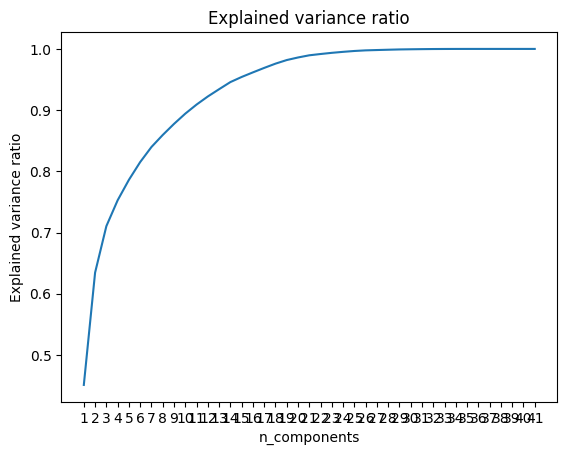

In [ ]:
plt.plot(range(1,len(cumulative_variance_full)+1),cumulative_variance_full)
plt.xticks(range(1,len(cumulative_variance_full)+1))
plt.title("Explained variance ratio")
plt.ylabel("Explained variance ratio")
plt.xlabel("n_components")
plt.show()

In [ ]:
# Getting eigenvalues
eigenvalues = pca_full.explained_variance_

In [ ]:
# Print eigenvalues
print('The top 3 eigenvalues are:', eigenvalues[:3])

The top 3 eigenvalues are: [18.49635712  7.52884085  3.1146181 ]


In [ ]:
# save plotly plots for html
fig.write_html('2DPCAPlot.html')

In [ ]:
fig1.write_html('2DPCAMatrix.html')

In [ ]:
fig2.write_html('3DPCAMatrix.html')

In [ ]:
fig3.write_html('3DPCAPlot.html')